# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
'''
Jupyter Notebook does not know of environment variables outside its environment
I need some variables for GPU training (i.e. CUDA)
Following lines pass this info to juypter notebook
'''
import sys,os,os.path
sys.path.append(os.path.expanduser('~/code/eol_hsrl_python'))
os.environ['HSRL_INSTRUMENT']='gvhsrl'
os.environ['HSRL_CONFIG']=os.path.expanduser('~/hsrl_config')


# Load pickled data
import pickle

# STEP : Serialized data is located in folder "datasets"

training_file   = 'datasets/train.p'
validation_file = 'datasets/valid.p'
testing_file    = 'datasets/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
import numpy as np

# Number of training examples
n_train = X_train.shape[0]

# Number of validation examples
n_validation = X_valid.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_test.shape[1:3]

# How many unique classes/labels there are in the dataset.
# (You could also check "validation" and "test" data for additional labels
# but this doesn't make too much sense)
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

'''
Add on
'''

# Additional info
print("\nAdditional info")
image_channels = X_test.shape[3]
print("Image data channels =", image_channels)

# Here a sanity check could be added if amount feature 
# mismatches amount labels etc. Assert for example
assert n_train == y_train.shape[0],      "Training data mismatch"
assert n_validation == y_valid.shape[0], "Validation data mismatch"
assert n_test == y_test.shape[0],        "Test data mismatch"

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43

Additional info
Image data channels = 3


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

Sample image below. Corresponding label/index is: 3


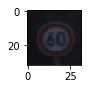

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0,len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print("Sample image below. Corresponding label/index is:", y_train[index])


Distribution of the training data BEFORE balancing


<function matplotlib.pyplot.show>

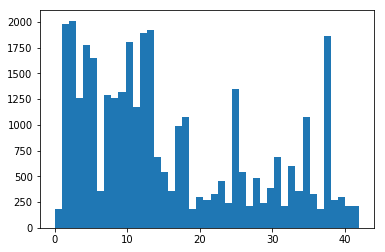

In [4]:
print("\nDistribution of the training data BEFORE balancing")
hist_y_train, hist_x_train, _ = plt.hist(y_train, bins=n_classes)
plt.show


Distribution of the validation data


<function matplotlib.pyplot.show>

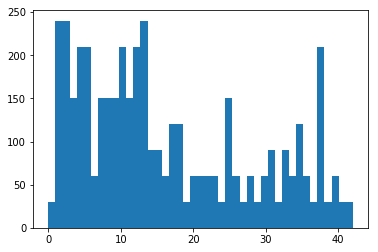

In [5]:
print("\nDistribution of the validation data")
hist_y_valid, hist_x_valid, _ = plt.hist(y_valid, bins=n_classes)
plt.show

In [6]:
print("The distribution is NOT a discrete uniform distribution\n")

i = 0
for occurence in hist_y_train:
    print(i, 'label occurs', int(occurence), 'times')
    i = i+1

print("\nMaximum occurence label has ", max(hist_y_train), "samples" )
print("Minimum occurence label has ", min(hist_y_train), "samples\n")

print("This is an over representation of a factor greater", int(max(hist_y_train)/min(hist_y_train)), "!")
print("I solve this by making each samples set as large as the largest one by applying salt&pepper")


The distribution is NOT a discrete uniform distribution

0 label occurs 180 times
1 label occurs 1980 times
2 label occurs 2010 times
3 label occurs 1260 times
4 label occurs 1770 times
5 label occurs 1650 times
6 label occurs 360 times
7 label occurs 1290 times
8 label occurs 1260 times
9 label occurs 1320 times
10 label occurs 1800 times
11 label occurs 1170 times
12 label occurs 1890 times
13 label occurs 1920 times
14 label occurs 690 times
15 label occurs 540 times
16 label occurs 360 times
17 label occurs 990 times
18 label occurs 1080 times
19 label occurs 180 times
20 label occurs 300 times
21 label occurs 270 times
22 label occurs 330 times
23 label occurs 450 times
24 label occurs 240 times
25 label occurs 1350 times
26 label occurs 540 times
27 label occurs 210 times
28 label occurs 480 times
29 label occurs 240 times
30 label occurs 390 times
31 label occurs 690 times
32 label occurs 210 times
33 label occurs 599 times
34 label occurs 360 times
35 label occurs 1080 times
36

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [7]:
from scipy import ndimage

def saltAndPepperNoise(img, numPixels):
    for i in range(numPixels):
        idx_x = int(np.random.rand()*img.shape[0])
        idx_y = int(np.random.rand()*img.shape[1])
        
        value = random.randint(0, 1)*255

        img[idx_x, idx_y, 0] = value
        img[idx_x, idx_y, 1] = value
        img[idx_x, idx_y, 2] = value
          
    return img

def rotate(img, rotBy):
    img = ndimage.rotate(img,angle=rotBy,reshape=False)
    return img

(32, 32, 3)


180

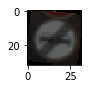

In [8]:
%matplotlib inline

index = 23
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
#plt.imshow(image)
plt.imshow(rotate(image,-10))
print(rotate(image,0).shape)
#print("Sample image below. Corresponding label/index is:", y_train[index])

len(np.argwhere(y_train == 0))


In [9]:
### Database equalization
### all small classes shall have 20% of 
### the difference from current distirbution - value for equally distribution

# degree of rotation max
rotation_max = 0.2

needed_elements = int(0)
for n in range(n_classes):
    needed_elements += int((max(hist_y_train)-hist_y_train[n])*0.2)

new_X_train = (np.zeros((int(needed_elements),32,32,3))).astype(np.uint8)
new_y_train = np.zeros(int(needed_elements))

i = int(0)
for n in range(n_classes):
    class_picks = np.argwhere(y_train == n)
    create_new = int((max(hist_y_train)-len(class_picks))*0.2)
    
    while (create_new > 0):
        pick = random.choice(class_picks)
        rotation = (np.random.rand()-0.5)*rotation_max
                
        new_X_train[i] = rotate(saltAndPepperNoise(X_train[pick],int(32*32*0.05)),rotation)
        new_y_train[i] = n
       
        create_new -=1
        i +=1
    print(n)
        
X_train = np.insert(X_train, 0, new_X_train, 0)
y_train = np.insert(y_train, 0, new_y_train)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42



Distribution of the training data AFTER balancing


<function matplotlib.pyplot.show>

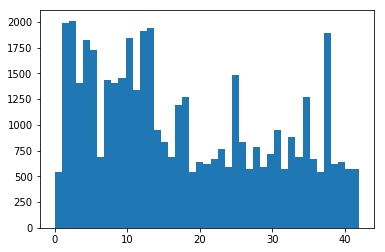

In [10]:
%matplotlib inline

print("\nDistribution of the training data AFTER balancing")
y_balanced, x_balanced, _ = plt.hist(y_train, bins=n_classes)
plt.show

In [11]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.

from sklearn.utils import shuffle
import cv2

# take from other source
# source: https://stackoverflow.com/questions/28518684/histogram-equalization-of-grayscale-images-with-numpy
def image_histogram_equalization(image, number_bins=256):
    # from http://www.janeriksolem.net/2009/06/histogram-equalization-with-python-and.html

    # get image histogram
    image_histogram, bins = np.histogram(image.flatten(), number_bins, normed=True)
    cdf = image_histogram.cumsum() # cumulative distribution function
    cdf = 255 * cdf / cdf[-1] # normalize

    # use linear interpolation of cdf to find new pixel values
    image_equalized = np.interp(image.flatten(), bins[:-1], cdf)

    return image_equalized.reshape(image.shape)


def preprocess_image(image):
    # convert to gray scale (check later: does preserving color make sense)
    img = np.mean(image,3).reshape(-1,32,32,1)

    img = image_histogram_equalization(img)
    
    # normalize
    img = (img-128.0)/128.0
    
    return img

color_channels = 1

# STEP preprocess
X_train = preprocess_image(X_train)
X_valid = preprocess_image(X_valid)
X_test = preprocess_image(X_test)

11
Processed sample image below. Corresponding label/index is: 11


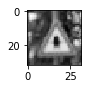

In [12]:
# Showing a sample image after applying preprocessing

# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0,len(X_train))
processed_image = X_train[index].squeeze()

print(y_train[index])

plt.figure(figsize=(1,1))
plt.imshow(processed_image, cmap='gray')
print("Processed sample image below. Corresponding label/index is:", y_train[index])


In [13]:
# STEP shuffle
# Shuffle to prevent learning in one direction only
X_train, y_train = shuffle(X_train, y_train)

### Model Architecture

In [14]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

from tensorflow.contrib.layers import flatten
import tensorflow as tf

EPOCHS = 1000
BATCH_SIZE = 128

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, color_channels, 32), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(32))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 32, 64), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(64))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 300.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1600, 800), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(800))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 300. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(800, 512), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(512))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(512, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

x = tf.placeholder(tf.float32, (None, 32, 32, color_channels))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [22]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
rate = 0.001
min_accuracy = 0.95

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)

optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
        if(validation_accuracy > min_accuracy):
            print('Min accuracy was reached')
            saver.save(sess, './lenet')
            print("Model saved")
            break
        
    

Training...

EPOCH 1 ...
Validation Accuracy = 0.885

EPOCH 2 ...
Validation Accuracy = 0.922

EPOCH 3 ...
Validation Accuracy = 0.935

EPOCH 4 ...
Validation Accuracy = 0.923

EPOCH 5 ...
Validation Accuracy = 0.937

EPOCH 6 ...
Validation Accuracy = 0.943

EPOCH 7 ...
Validation Accuracy = 0.939

EPOCH 8 ...
Validation Accuracy = 0.930

EPOCH 9 ...
Validation Accuracy = 0.951

Min accuracy was reached
Model saved


In [23]:
# Testing on test dataset
with tf.Session() as sess:
    # Restoring model
    saver.restore(sess, './lenet')
    test_accuracy = evaluate(X_test, y_test)
    print('Test Accuracy = {:.3f}'.format(test_accuracy))


INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.936


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

Showing the originals


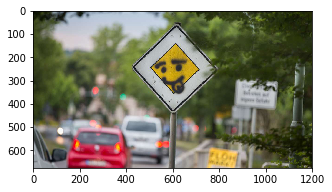

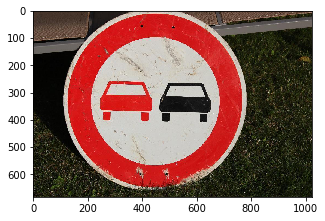

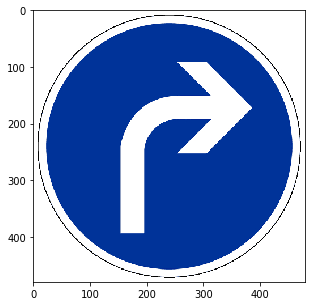

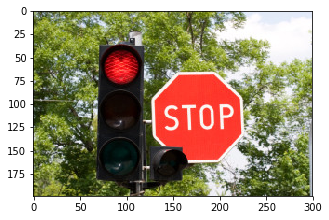

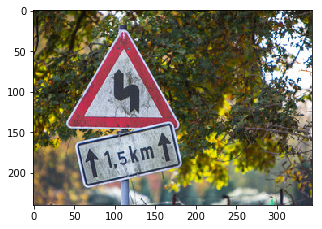

In [69]:
import scipy

test_0_orig = scipy.ndimage.imread("testimages/00_orig.jpg")
test_1_orig = scipy.ndimage.imread("testimages/01_orig.jpg")
test_2_orig = scipy.ndimage.imread("testimages/02_orig.jpg")
test_3_orig = scipy.ndimage.imread("testimages/03_orig.jpg")
test_4_orig = scipy.ndimage.imread("testimages/04_orig.jpg")

test_0 = scipy.ndimage.imread("testimages/00.jpg")
test_1 = scipy.ndimage.imread("testimages/01.jpg")
test_2 = scipy.ndimage.imread("testimages/02.jpg")
test_3 = scipy.ndimage.imread("testimages/03.jpg")
test_4 = scipy.ndimage.imread("testimages/04.jpg")

print("Showing the originals")

plt.figure(figsize=(5,5))
plt.imshow(test_0_orig)
plt.figure(figsize=(5,5))
plt.imshow(test_1_orig)
plt.figure(figsize=(5,5))
plt.imshow(test_2_orig)
plt.figure(figsize=(5,5))
plt.imshow(test_3_orig)
plt.figure(figsize=(5,5))
plt.imshow(test_4_orig)




Showing the excerpts 32x32

Correct labels

12 Priority road
9 No passing
33 Turn right ahead
14 Stop
21 Double curve


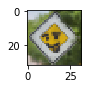

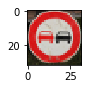

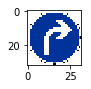

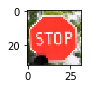

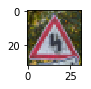

In [59]:
print("Showing the excerpts 32x32")

plt.figure(figsize=(1,1))
plt.imshow(test_0)
print("\nCorrect labels")
print("\n12 Priority road")
plt.figure(figsize=(1,1))
plt.imshow(test_1)
print("9 No passing")
plt.figure(figsize=(1,1))
plt.imshow(test_2)
print("33 Turn right ahead")
plt.figure(figsize=(1,1))
plt.imshow(test_3)
print("14 Stop")
plt.figure(figsize=(1,1))
plt.imshow(test_4)
print("21 Double curve")

### Predict the Sign Type for Each Image

In [54]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

sequence = [test_0, test_1, test_2, test_3, test_4]
preprocessed_sequence = preprocess_image(sequence)

with tf.Session() as sess:
    # Restoring model's variables from saved file
    saver.restore(sess, './lenet')
    predictions = sess.run(tf.argmax(logits, 1), feed_dict={x: preprocessed_sequence})
    print("\nEstimated classes")
    print(predictions)


INFO:tensorflow:Restoring parameters from ./lenet

Estimated classes
[12 41 33 14 21]


### Analyze Performance

In [62]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
correct_percent = ((5-1)/5.)*100
print("Correctly classified: ", correct_percent, "%")

Correctly classified:  80.0 %


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [65]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

n_top = 5

with tf.Session() as sess:
    saver.restore(sess, './lenet')
    top_label_probabilities, top_labels = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=n_top ),
                                                   feed_dict={x: preprocessed_sequence})
    print(top_labels)
    print(top_label_probabilities)



INFO:tensorflow:Restoring parameters from ./lenet
[[12 11 21 40 36]
 [41  9 20 23 16]
 [33 26 40 37 11]
 [14 33 17  0 39]
 [21 11 30 27 24]]
[[  9.98191535e-01   1.77368871e-03   1.76490430e-05   1.58715029e-05
    6.70050440e-07]
 [  9.98369396e-01   1.63065596e-03   9.91608684e-10   1.44187370e-10
    2.20005221e-12]
 [  1.00000000e+00   3.57216629e-19   2.19265289e-19   4.80430377e-21
    2.06541949e-24]
 [  9.99940395e-01   4.77828617e-05   1.05794325e-05   7.03319699e-07
    3.00168637e-07]
 [  1.00000000e+00   1.03129452e-08   6.72244149e-10   1.18772147e-12
    1.29092404e-14]]


In [76]:
### Findings

print("The next most probable class to the wrongly classified sign is the correct one 41 -> 9")

print("\nThe performance on the first sign, which is changed by graffiti is actually very good")

print("\nThe performance on artificial (perfect) (33) Turn right ahead sign is as expect very good")


The next most probable class to the wrongly classified sign is the correct one 41 -> 9

The performance on the first sign, which is changed by graffiti is actually very good

The performance on artificial (perfect) (33) Turn right ahead sign is as expect very good


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [39]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")